# House Price Prediction



## Dataset Description
### We have train.csv containing train data, test.csv containing test data and data_description.txt which contains description of the data being used.

## Importing Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data loading

In [156]:
train_data = pd.read_csv("train.csv")

In [157]:
test_data = pd.read_csv("test.csv")

## Checking missing values

In [158]:
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True, ascending = False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

## Bar Plot
### by plotting missing values bar graph, we can analyse the features which will not be having much say in our prediction. If we have a feature with large number of missing values we can completely ignore that.

<Axes: >

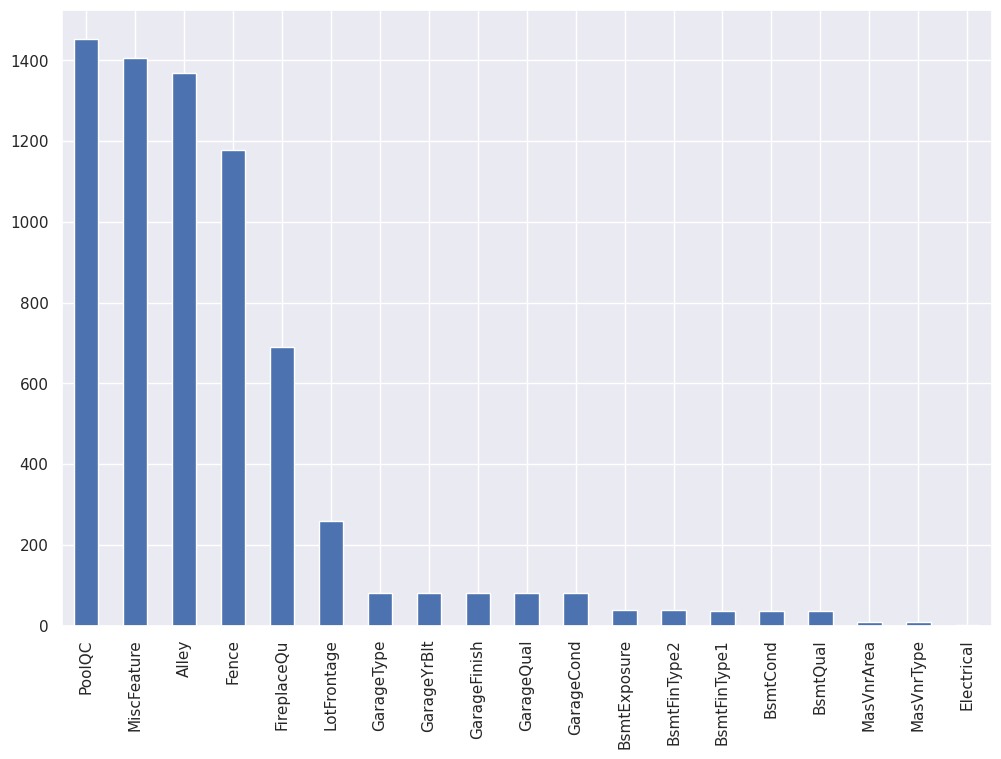

In [159]:
plt.figure(figsize = (12,8))
missing.plot.bar()

## Histogram plot
### Histogram is similar to a bar plot where X-axis represents the bin ranges and Y-axis represents the frequnecy. It tells us about the skewness of the distribution


<Axes: xlabel='SalePrice', ylabel='Count'>

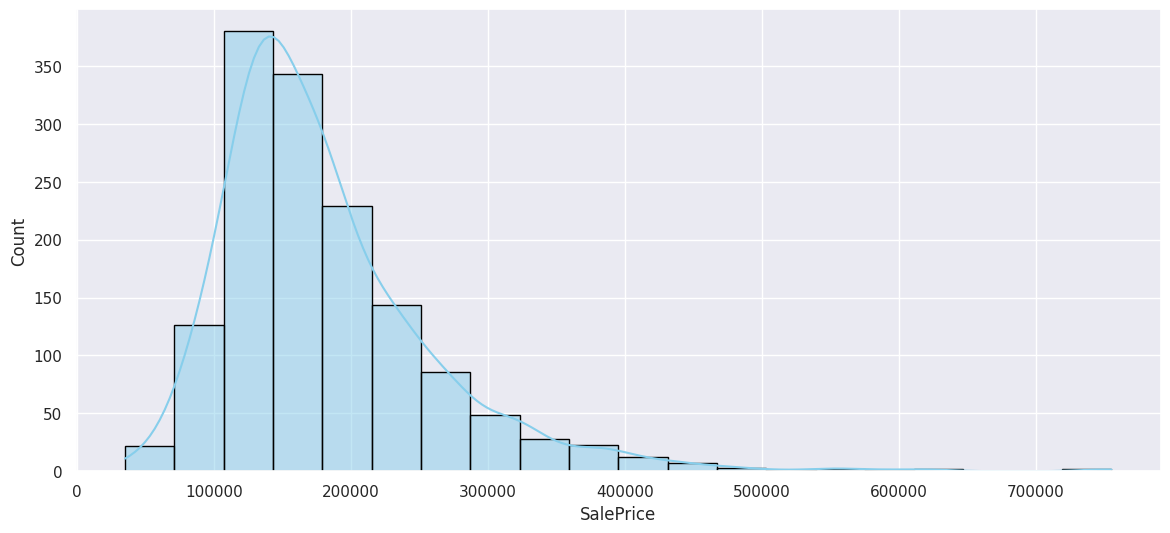

In [160]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.histplot(train_data['SalePrice'], kde = True, bins = 20, color = 'skyblue', edgecolor = 'black')

## Correlation
### Correlation helps in predicting one attribute from another

## separating categorical and numerical feature

In [161]:
numeric_features = train_data.select_dtypes(include = [np.number])
numeric_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [162]:
categorical_features = train_data.select_dtypes(include = object)
categorical_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [163]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False ),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## Correlation Plot

<Axes: title={'center': 'Correlation of numeric features with SalePrice'}>

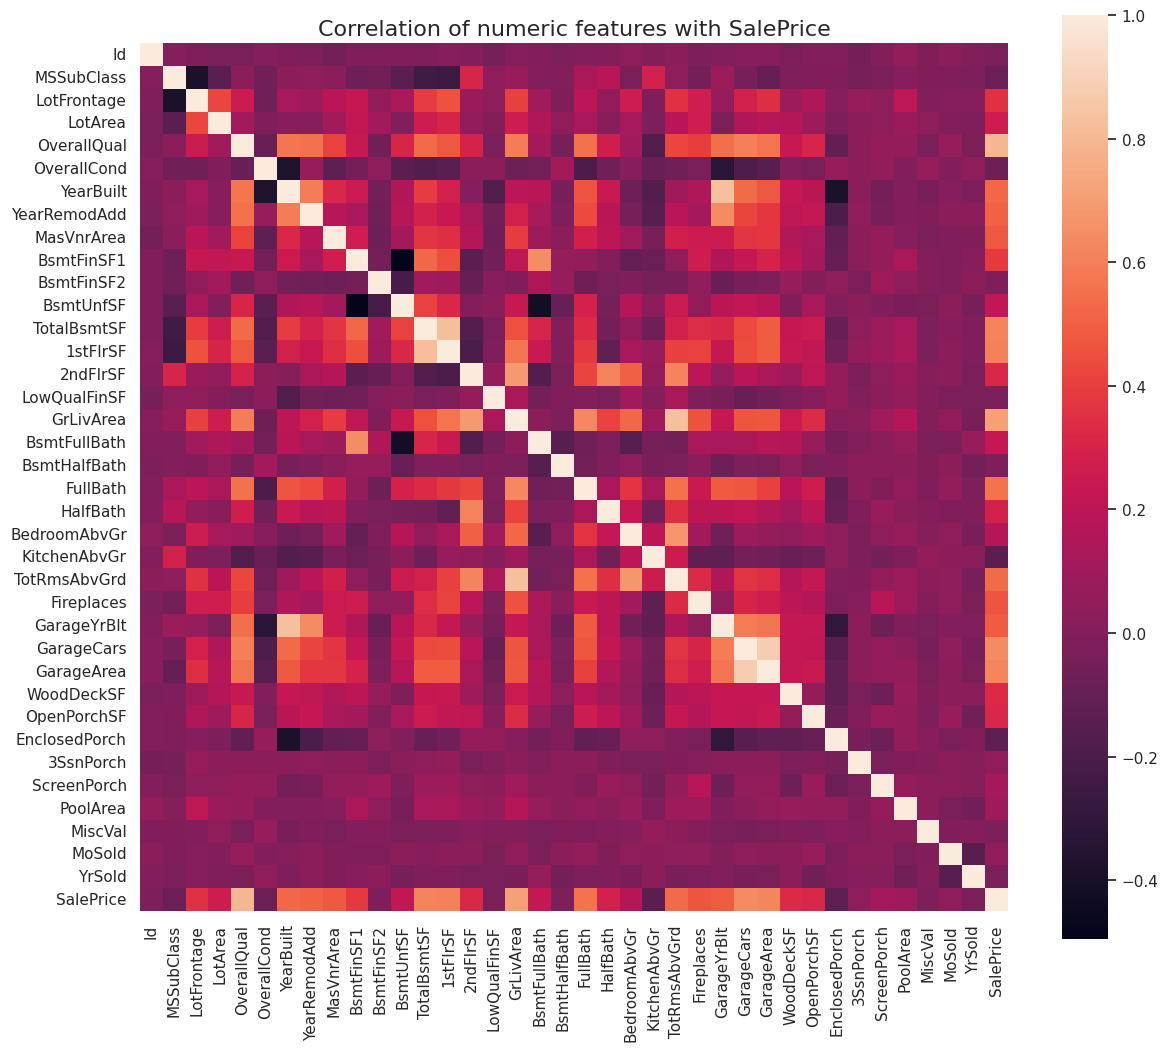

In [164]:
f, ax = plt.subplots(figsize = (14,12))
plt.title("Correlation of numeric features with SalePrice", y = 1, size= 16)
sns.heatmap(correlation, square = True, vmax = 1)

## Multicorrelation between top 11 features
### We can see GarageCars and GarageArea are highly correlated with each other so we can remove one of these. Same for TotalBsmtDF and 1stFlrSF.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


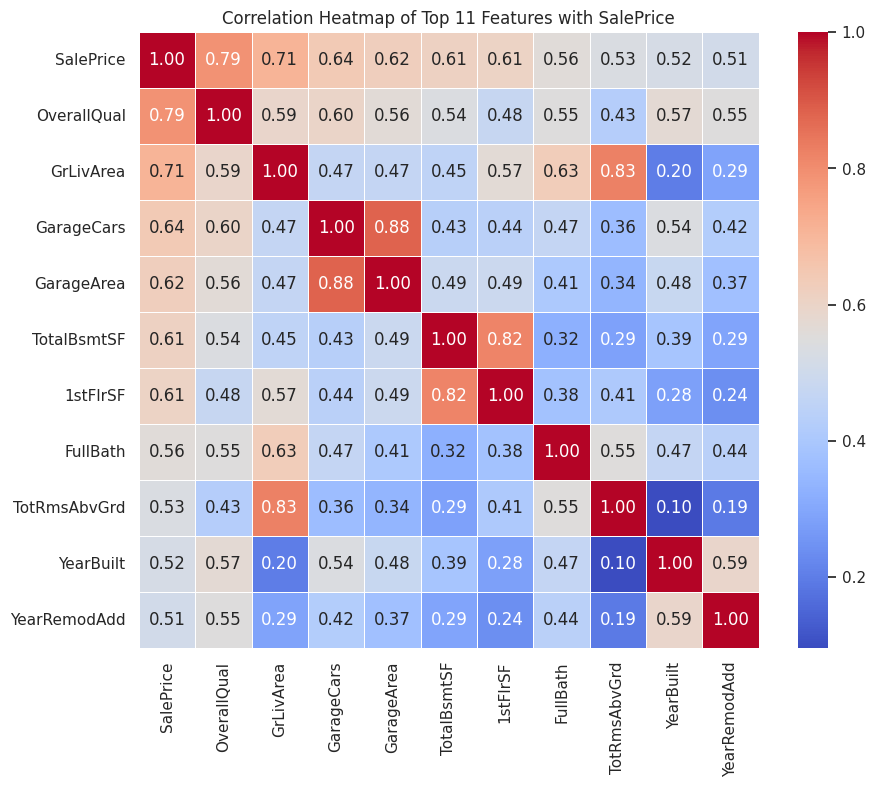

In [165]:
n = 11
cols = correlation.nlargest(n,'SalePrice')['SalePrice'].index
print(cols)
corr_matrix = train_data[cols].corr()
# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Top 11 Features with SalePrice')
plt.show()

##Scatter plot
### Scatter plots show relationship between two numeric variables and also to detect outliers in the data. We have already seen in heatmap that GarageCars and GarageArea are highly correlated and that can we seen here as well as the number of GarageCars increasing the GarageArea is also increasing

<Axes: xlabel='GarageCars', ylabel='GarageArea'>

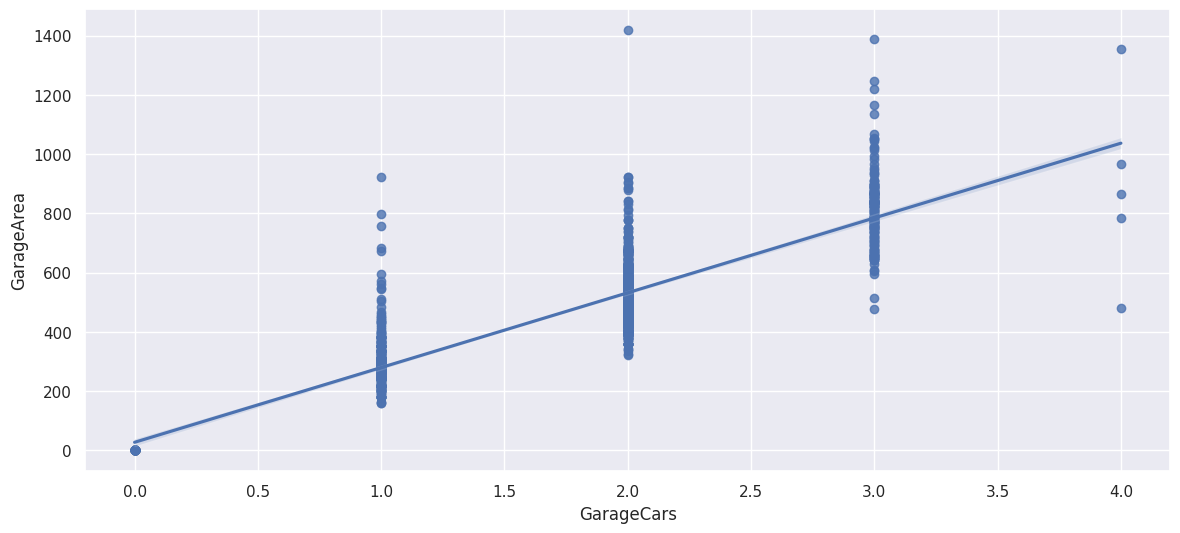

In [166]:
sns.regplot( x = 'GarageCars', y ='GarageArea', data = train_data, scatter = True)


## Scatter Plot between some features and SalePrice

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

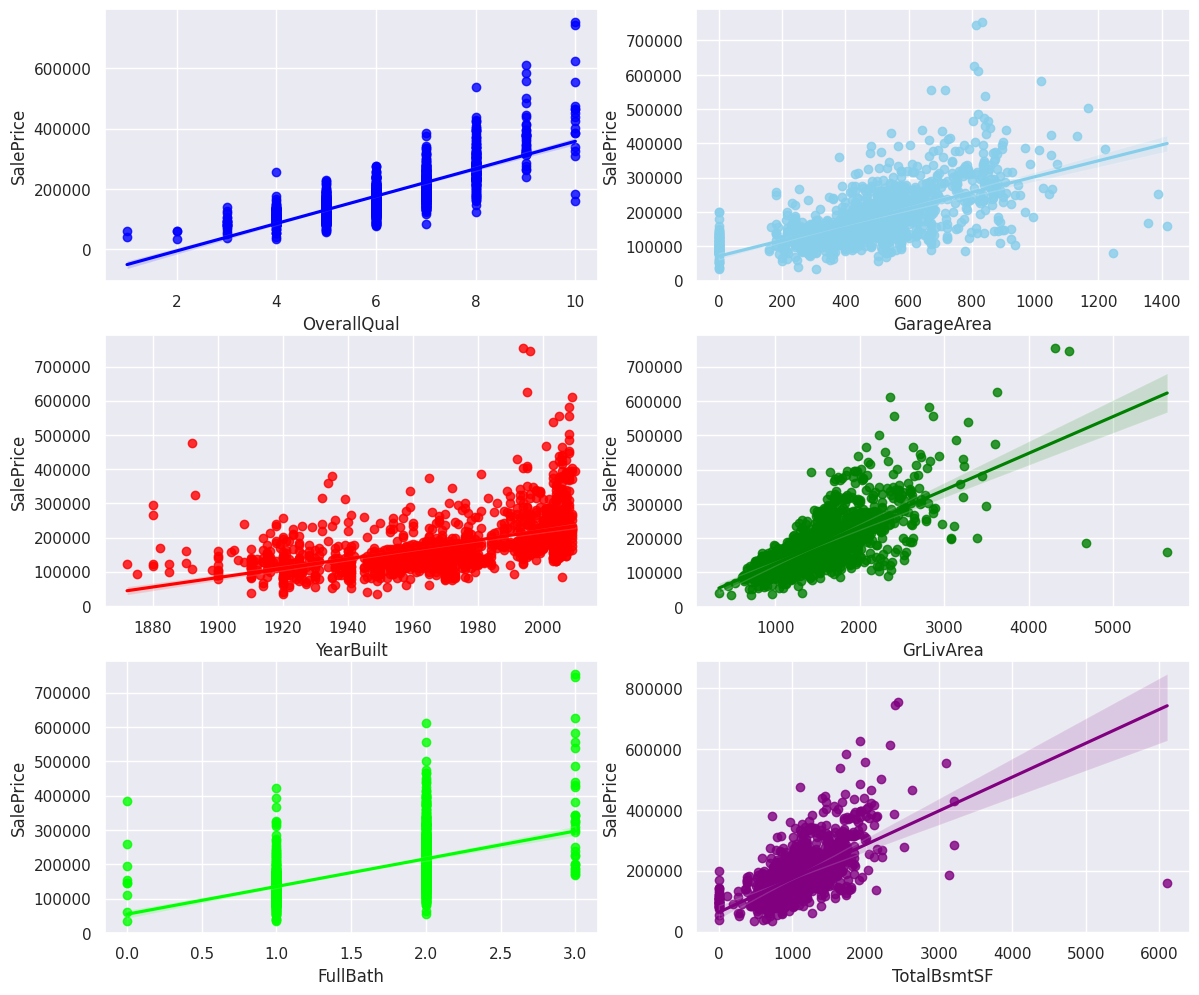

In [167]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
sns.regplot(data = train_data, x = 'OverallQual', y = 'SalePrice', fit_reg = True, scatter = True, ax = ax1, color = 'blue' )
sns.regplot(data = train_data, x = 'GarageArea', y = 'SalePrice', fit_reg = True, scatter = True, ax = ax2, color = 'skyblue' )
sns.regplot(data = train_data, x = 'YearBuilt', y = 'SalePrice', fit_reg = True, scatter = True, ax = ax3, color = 'red' )
sns.regplot(data = train_data, x = 'GrLivArea', y = 'SalePrice', fit_reg = True, scatter = True, ax = ax4 , color = 'green')
sns.regplot(data = train_data, x = 'FullBath', y = 'SalePrice', fit_reg = True, scatter = True, ax = ax5, color = 'lime' )
sns.regplot(data = train_data, x = 'TotalBsmtSF', y = 'SalePrice', fit_reg = True, scatter = True, ax = ax6 , color = 'purple')

## BoxPlots
A box and whisker plot or diagram (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph. These can be displayed alongside a number line, horizontally or vertically.

<Axes: xlabel='SalePrice'>

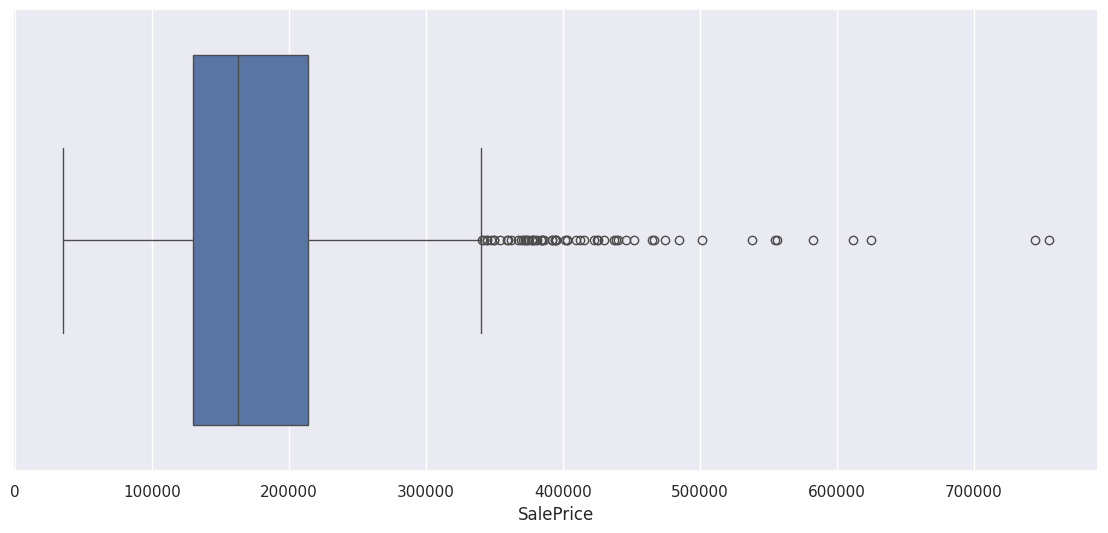

In [168]:
sns.boxplot(x = train_data['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

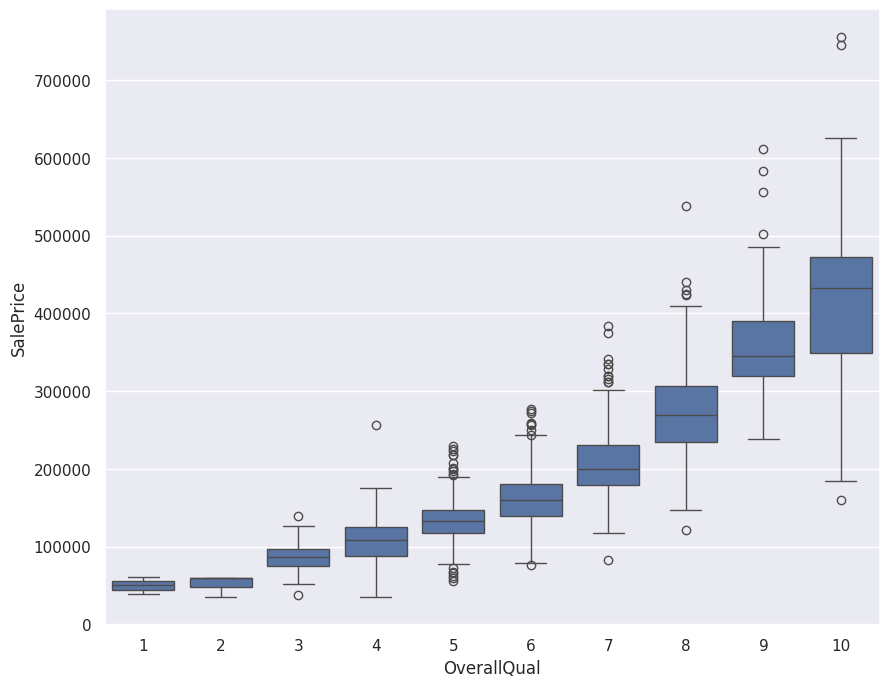

In [169]:
f, ax = plt.subplots(figsize = (10,8))
sns.boxplot(x = "OverallQual", y = "SalePrice", data = train_data)

<Axes: xlabel='SalePrice'>

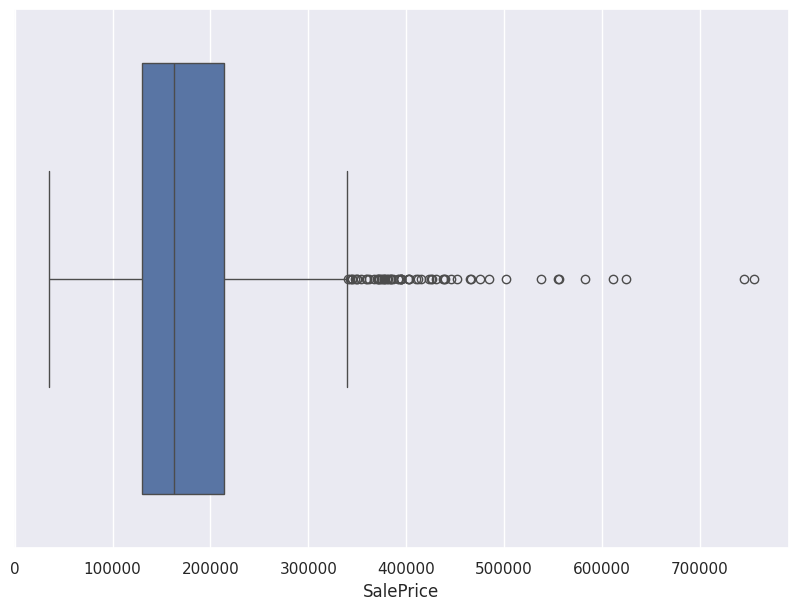

In [170]:
f, ax = plt.subplots(figsize = (10,7))
sns.boxplot(x = train_data['SalePrice'])


## Removing bad features
### we can remove features which has very low correlation with the target feature as we have seen earlier, also features which are strongly correlated to each other we can remove one of those features as well and features having more number of missing values can also be removed



In [171]:
#using regular expressions to make a list of feature to remove
import re
text = """
WoodDeckSF 0.324413
2ndFlrSF 0.319334
OpenPorchSF 0.315856
HalfBath 0.284108
LotArea 0.263843
BsmtFullBath 0.227122
BsmtUnfSF 0.214479
BedroomAbvGr 0.168213
ScreenPorch 0.111447
PoolArea 0.092404
MoSold 0.046432
3SsnPorch 0.044584
BsmtFinSF2 -0.011378
BsmtHalfBath -0.016844
MiscVal -0.021190
Id -0.021917
LowQualFinSF -0.025606
YrSold -0.028923
OverallCond -0.077856
MSSubClass -0.084284
EnclosedPorch -0.128578
KitchenAbvGr -0.135907
"""
pattern = r"\b[A-Za-z]+[A-Za-z0-9_]*\b"

features_to_remove = re.findall(pattern, text)

print(features_to_remove)


['WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']


In [172]:
train_data.drop(features_to_remove, inplace = True, axis = 1)

In [173]:
test_data.drop(features_to_remove, inplace = True, axis = 1)

In [174]:
train_data.head()

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal,208500
1,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal,181500
2,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal,223500
3,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,0,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal,250000


In [175]:
train_data.shape

(1460, 61)

In [176]:
test_data.shape

(1459, 60)

In [177]:

train_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True, axis = 1 )

test_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True, axis = 1 )

## Encoding

In [178]:
y = train_data['SalePrice']
train_data.drop(['SalePrice'], inplace =True, axis = 1)

In [179]:
num_cols = [col for col in train_data.columns if train_data[col].dtype in ['float64','int64']]
cat_cols = [col for col in train_data.columns if train_data[col].dtype not in ['float64','int64']]

In [180]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

train_data[num_cols] = SimpleImputer().fit_transform(train_data[num_cols])
test_data[num_cols] = SimpleImputer().fit_transform(test_data[num_cols])

train_data[num_cols] = MinMaxScaler().fit_transform(train_data[num_cols])
test_data[num_cols] = MinMaxScaler().fit_transform(test_data[num_cols])

In [181]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond',
                'MasVnrType','Electrical','MSZoning','Utilities','Functional','Exterior2nd','KitchenQual','Exterior1st','SaleType']
train_data[columns_None] = train_data[columns_None].fillna('none')
test_data[columns_None] = test_data[columns_None].fillna('none')

In [182]:
test_data.isnull().sum()

MSZoning         0
LotFrontage      0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive  

## Encoding of categorical values

In [183]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
train_data[cat_cols] = encoder.fit_transform(train_data[cat_cols])


In [186]:
test_data[cat_cols] = encoder.fit_transform(test_data[cat_cols])

In [187]:
test_data.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,3SsnPorch,SaleType,SaleCondition
0,2.0,0.329609,1.0,3.0,3.0,0.0,4.0,0.0,12.0,1.0,...,0.211538,2.0,0.2,0.490591,3.0,4.0,2.0,0.0,8.0,4.0
1,3.0,0.335196,1.0,0.0,3.0,0.0,0.0,0.0,12.0,2.0,...,0.201923,2.0,0.2,0.209677,3.0,4.0,2.0,0.0,8.0,4.0
2,3.0,0.296089,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,...,0.326923,0.0,0.4,0.323925,3.0,4.0,2.0,0.0,8.0,4.0
3,3.0,0.318436,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,...,0.330128,0.0,0.4,0.315860,3.0,4.0,2.0,0.0,8.0,4.0
4,3.0,0.122905,1.0,0.0,1.0,0.0,4.0,0.0,22.0,2.0,...,0.310897,1.0,0.4,0.340054,3.0,4.0,2.0,0.0,8.0,4.0


In [ ]:
##Model Selection

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [190]:
X_train,X_test,y_train,y_test = train_test_split(train_data,y,test_size=0.2,random_state=42)

##Regression Models

In [193]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [194]:
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)

    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)

print(df_results)

                   Model              RMSE
4           SGDRegressor  161896069.668393
0                    SVR      88655.193898
3             ElasticNet      49357.658936
5          BayesianRidge      35035.978184
2                  Ridge      34983.272487
6       LinearRegression      34973.709702
7  RandomForestRegressor      28590.861426
1           XGBRegressor      27694.003657


In [196]:
parameters = {'lambda': 3.559040735218393,
 'alpha': 0.25772549522868987,
 'colsample_bytree': 0.6,
 'subsample': 0.5,
 'learning_rate': 0.014,
 'n_estimators': 4000,
 'max_depth': 11,
 'random_state': 24,
 'min_child_weight': 3}

In [197]:

XGBR = XGBRegressor(**parameters)

XGBR.fit(X_train, y_train)
predicted = XGBR.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

Root Mean Square Error test = 25102.37240923499


In [199]:
test_preds = XGBR.predict(test_data)

In [201]:
submission_df = pd.read_csv("sample_submission.csv")
submission_df['SalePrice'] = test_preds
submission_df.to_csv('finalSubmission.csv', index=False)